In [ ]:
!gdown 1el5g3382t049C32Bczei5Ykho0ffBkOO

Downloading...
From: https://drive.google.com/uc?id=1el5g3382t049C32Bczei5Ykho0ffBkOO
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 15.6MB/s]


In [ ]:
import pandas as pd
df= pd.read_csv('aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


Before further data exploration, the preliminary step is to check if data is complete and has all the required details. Here, we check basic features of data frame using info() method,


*   Total features - 9
*   Data count - 180
*   No of numerical columns - 6
*   No of categorical columns - 3

Sufficient details are present for the next stage of data analysis. Non-Null count column does not indicate any features having null values. We validated the same by using the isna() function. The function sums the count of null values in each column. The result is 0 for all the columns





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Missing value and Outlier detection and treatment. Categorical datatype conversion**

---


Along with checking for null values, we should also detect any outlier values present in different columns in data. Depending on the column and how many outliers are present, we might or might not need to fix for outliers.

Here, for detecting outliers, we use a simple visualization technique called boxplot. The boxplot gives descriptive information on a column including the mean, median, 25 percentile, 50 percentile and 75 percentile. Along with this, It also plots the outliers(if any) on the positive and negative side

For our data, we will plot boxplots for all 6 numerical columns

*   For product KP781, there are lot of outlier values for the column 'Age'. Most of the customers for this product are young. Likely the class of elite atheletes training for competitive sports. The outlier values indicate that the product was also bought by some elderly men. Men around 40 are known to become fitness conscious. Since these are professional people and high earners, it explains why they chose the costly product among the available ones.
*   The outliers are found to be valid and are explained by known customer behavior. So, there is no treatment required for these values
*   The outliers on other box plots are not significant enough to warrant any treament









/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

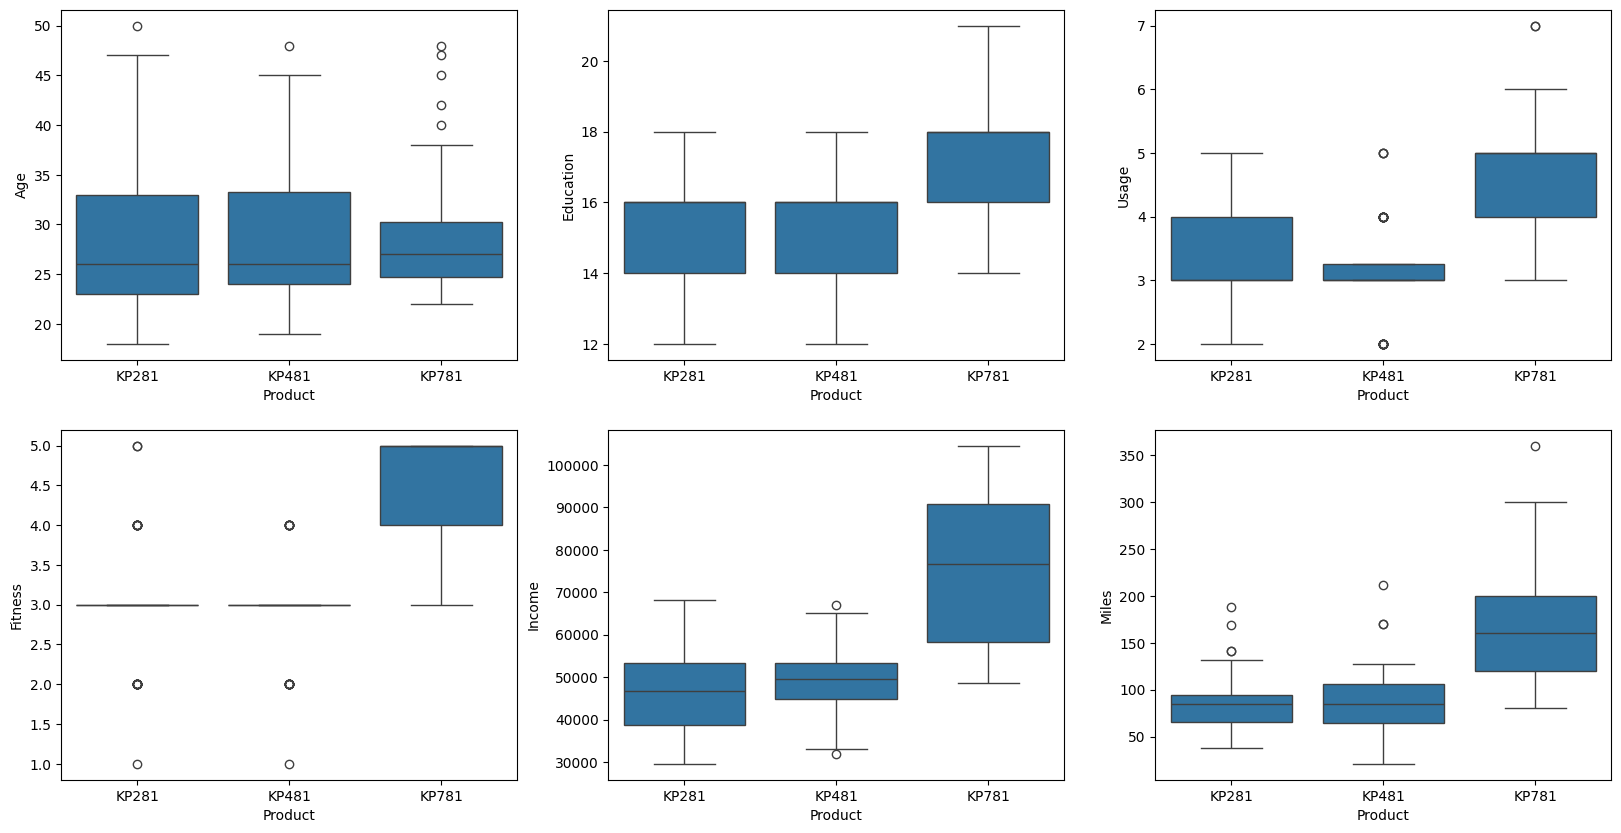

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x='Product', y='Age', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='Product', y='Education', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='Product', y='Usage', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='Product', y='Fitness', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='Product', y='Income', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='Product', y='Miles', data=df)
plt.show()

The plot Fitness vs Product is not legible. Looking into the Fitness column, we see it's a categorical feature with 5 sets of values(1 - 5). So, Fitness column should be converted to categorical column for further analysis

In [ ]:
df['Fitness'] = df['Fitness'].astype('category')

In [ ]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


**Marginal Probability**
There are some interesting questions to answer using Marginal probability


1.   What is the probability that any of the fitness product is bought by Male/Female?
2.   What is the probability of customer with maritalstatus 'single' buying the fitness product?
3.   What is the probability that the treadmill is used more than 4 times a week - heavy users?
4.   What is the probability of low income customer- less than 30000 buying treadmill





In [ ]:
prob_male = (df['Gender'] == 'Male').sum()/len(df)
prob_female = (df['Gender'] == 'Female').sum()/len(df)
print("The probability of male buying the treadmill is {}%".format(100 * round(prob_male,4)))
print("The probability of female buying the treadmill is {}%".format(100 * round(prob_female,4)))

The probability of male buying the treadmill is 57.78%
The probability of female buying the treadmill is 42.22%


In [ ]:
prob_single = (df['MaritalStatus'] == 'Single').sum()/len(df)
prob_partnered = (df['MaritalStatus'] == 'Partnered').sum()/len(df)
print("The probability of a single customer buying the treadmill is {}%".format(100 * round(prob_single,4)))
print("The probability of a partnered customer buying the treadmill is {}%".format(100 * round(prob_partnered,4)))

The probability of a single customer buying the treadmill is 40.56%
The probability of a partnered customer buying the treadmill is 59.440000000000005%


In [ ]:
prob_usage5 = (df['Usage'] > 4).sum()/len(df)
print("The probability that the treadmill is used 4 times a week is {}%".format(100 * round(prob_usage5,4)))

The probability that the treadmill is used 4 times a week is 14.44%


In [ ]:
prob_lowincome = (df['Income'] < 30000).sum()/len(df)
print("The probability that a customer with income less than 30000 buying the treadmill is {}%".format(100 * round(prob_lowincome,4)))

The probability that a customer with income less than 30000 buying the treadmill is 0.5599999999999999%


**Observations**
1. Aerofit's customer base is more Male centric
2. Partnered customers with more financial stability are more likely to buy Aerofit's products
3. Most of the users use < 3 times a week (85%)
4. Almost all the customers have an income > 30,000. In other words, the treadmill product category is affordable only for customer with income >30,000

Now, Let's delve into analysis of each treadmill product. This will help us understand what kind of customer buys these products.
1. What is the gender wise split up for each treadmill product? Are any particular products popular with specific gender?

In [ ]:
df_gender = pd.crosstab(df['Product'],
                            df['Gender'],
                               margins = True)
df_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


From the above data, let's calculate the following conditional probabilities
1. Given the customer is male what is the probability he buys KP281
2. Given the customer is male what is the probability he buys KP481
3. Given the customer is male what is the probability he buys KP781

In [ ]:
cond_prob_male_kp281 = df_gender.iloc[0,1]/df_gender.iloc[0,2]
print("1. {}".format(cond_prob_male_kp281))
cond_prob_male_kp481 = df_gender.iloc[1,1]/df_gender.iloc[1,2]
print("2. {}".format(cond_prob_male_kp481))
cond_prob_male_kp781 = df_gender.iloc[2,1]/df_gender.iloc[2,2]
print("3. {}".format(cond_prob_male_kp781))

1. 0.5
2. 0.5166666666666667
3. 0.825


**Observations**
1. There is no difference in gender makeup for the entry level product(KP281)
2. It's unambiguously clear that the advanced product(KP781) is overwhelmingly bought by male customers when compared to female - 82.5%


2. Does marital status impact the product the customer buys? Are there different preferences based on marital status?

In [ ]:
df_gender_mstatus = pd.crosstab(df['Product'],  df['MaritalStatus'], margins = True)
df_gender_mstatus

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


From the above data, let's calculate the following conditional probabilities
1. Given the customer is partnered what is the probability he buys KP281
2. Given the customer is partnered what is the probability he buys KP481
3. Given the customer is partnered what is the probability he buys KP781

In [ ]:
cond_prob_partnered_kp281 = df_gender_mstatus.iloc[0,0]/df_gender_mstatus.iloc[0,2]
print("1. {}".format(cond_prob_partnered_kp281))
cond_prob_partnered_kp481 = df_gender_mstatus.iloc[1,0]/df_gender_mstatus.iloc[1,2]
print("2. {}".format(cond_prob_partnered_kp481))
cond_prob_partnered_kp781 = df_gender_mstatus.iloc[2,0]/df_gender_mstatus.iloc[2,2]
print("3. {}".format(cond_prob_partnered_kp781))

1. 0.6
2. 0.6
3. 0.575


**Observations**
1. In all product categories, Partnered people are more likely to buy when compared to Single people
2. But the difference narrows down for top line product(KP781). This shows for advanced product, the Marital Status doesn't impact as much as other product categories

3. Adding one more variable into mixup, Let's see if Education makes a difference in product preferences

In [ ]:
df_gender_education = pd.crosstab([df['Product'], df['Education']],  df['Gender'], margins = True)
df_gender_education

Gender             Female  Male  All
Product Education                   
KP281   12              0     2    2
        13              0     3    3
        14             18    12   30
        15              2     2    4
        16             19    20   39
        18              1     1    2
KP481   12              0     1    1
        13              1     1    2
        14             12    11   23
        15              0     1    1
        16             14    17   31
        18              2     0    2
KP781   14              0     2    2
        16              2    13   15
        18              4    15   19
        20              0     1    1
        21              1     2    3
All                    76   104  180

**Observations**
1. Looks like KP781 is preferred by people with more years of education(16+) when compared to other products
2. There are some highly educated people(20/21 years) who chose KP781

**Visual Analysis**
Let's visually understand a few features and derive insights from it
1. To start with, which product sells the most

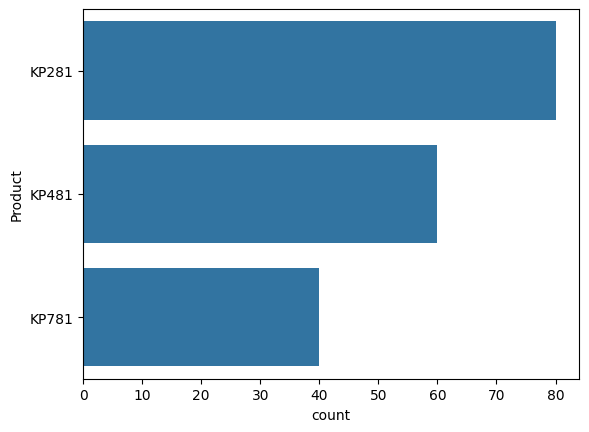

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Product'])
plt.show()

**Observations**
1. Given the KP281 costs less and entry level product, it is a no brainer that it sold the most
2. KP781 sales were the least due to the product being costly and preferred by advanced users

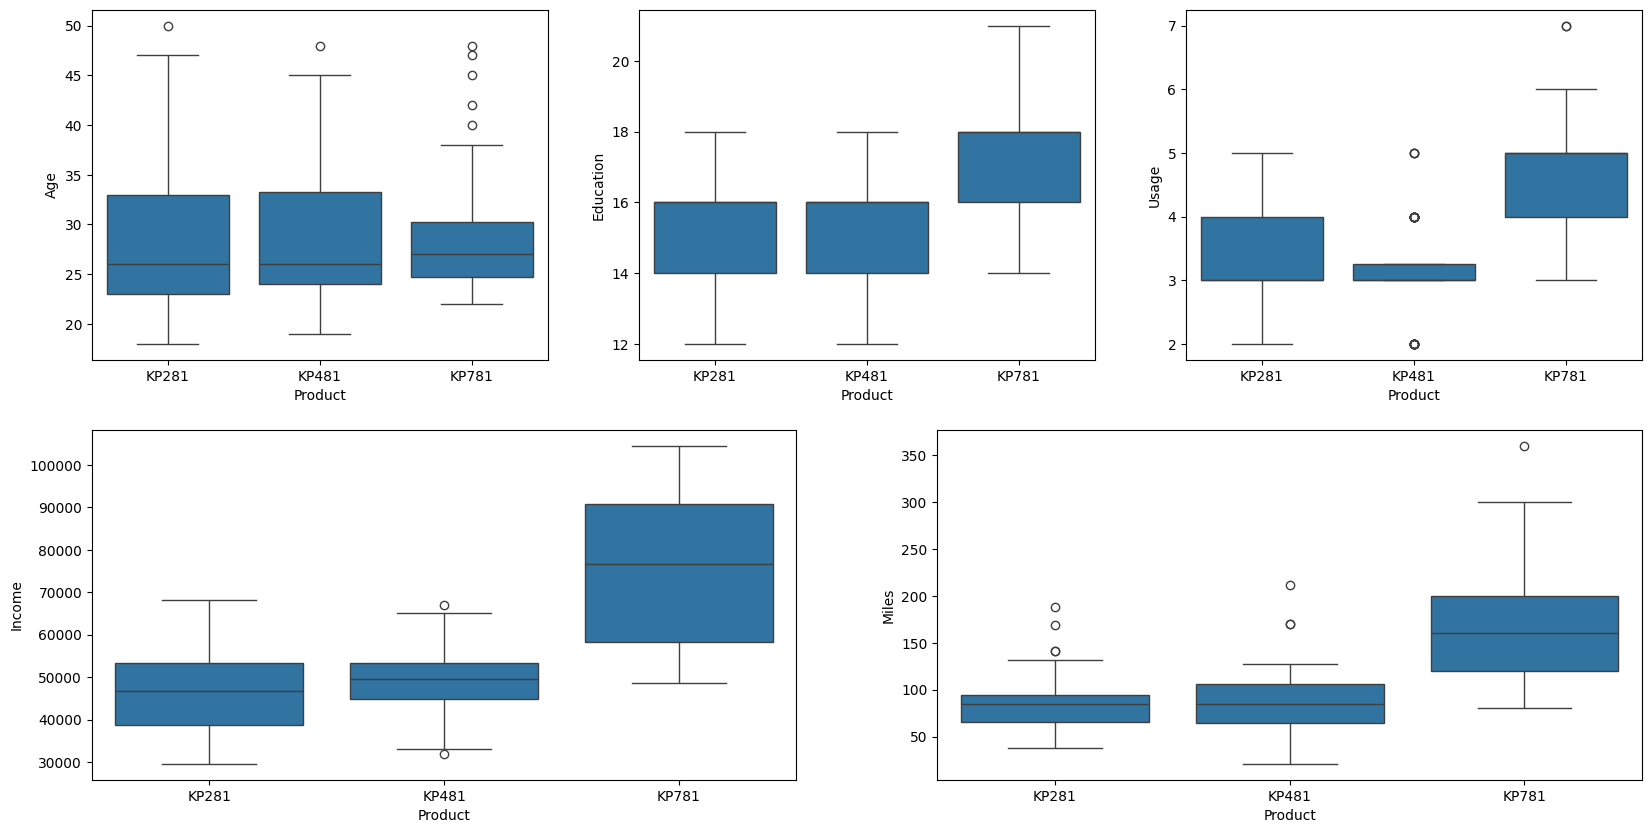

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x='Product', y='Age', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='Product', y='Education', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='Product', y='Usage', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='Product', y='Income', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='Product', y='Miles', data=df)
plt.show()

**Observations**
1. KP781 being the advanced product has on average more senior users(higher median age)
2. Clearly KP781 is preferred by people with more education. Correlates with users being senior in age
3. The usage plot indicates that buyers of KP781 are more heavy users with the median usage of 5 times a week
4. Also from Income and Miles charts, we come to conclusion that KP781 customer has a higher income and runs more Miles per day on average

**Compare KP281 vs KP481 vs KP781 using histogram plots**

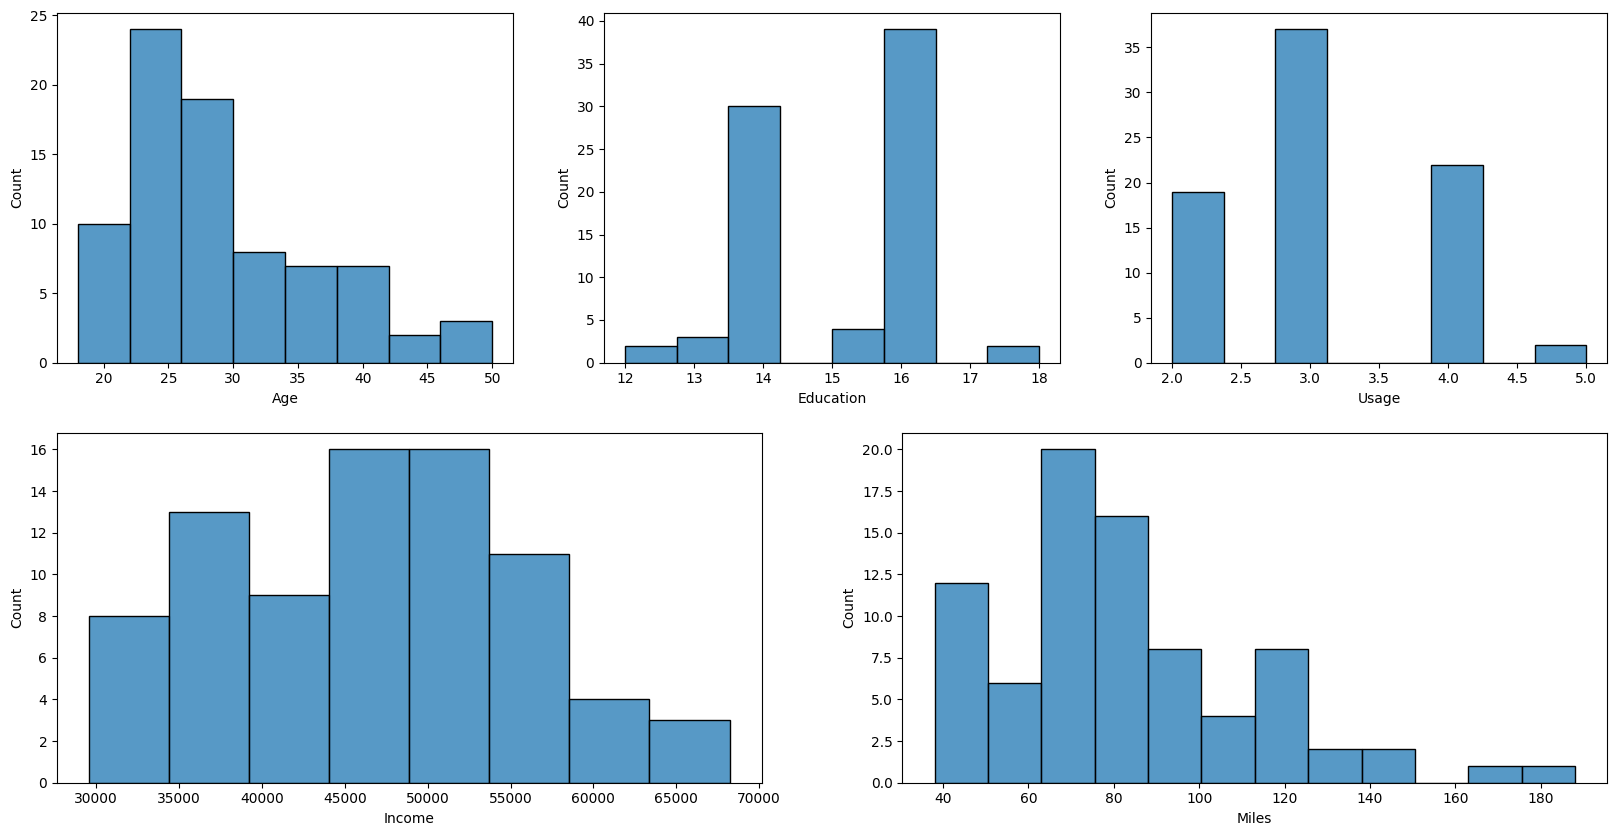

In [ ]:
customer_kp281 = df.loc[df['Product'] == 'KP281']
customer_kp281
fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(customer_kp281['Age'])

plt.subplot(2,3,2)
sns.histplot(customer_kp281['Education'])

plt.subplot(2,3,3)
sns.histplot(customer_kp281['Usage'])

plt.subplot(2,2,3)
sns.histplot(customer_kp281['Income'])


plt.subplot(2,2,4)
sns.histplot(customer_kp281['Miles'])

plt.show()

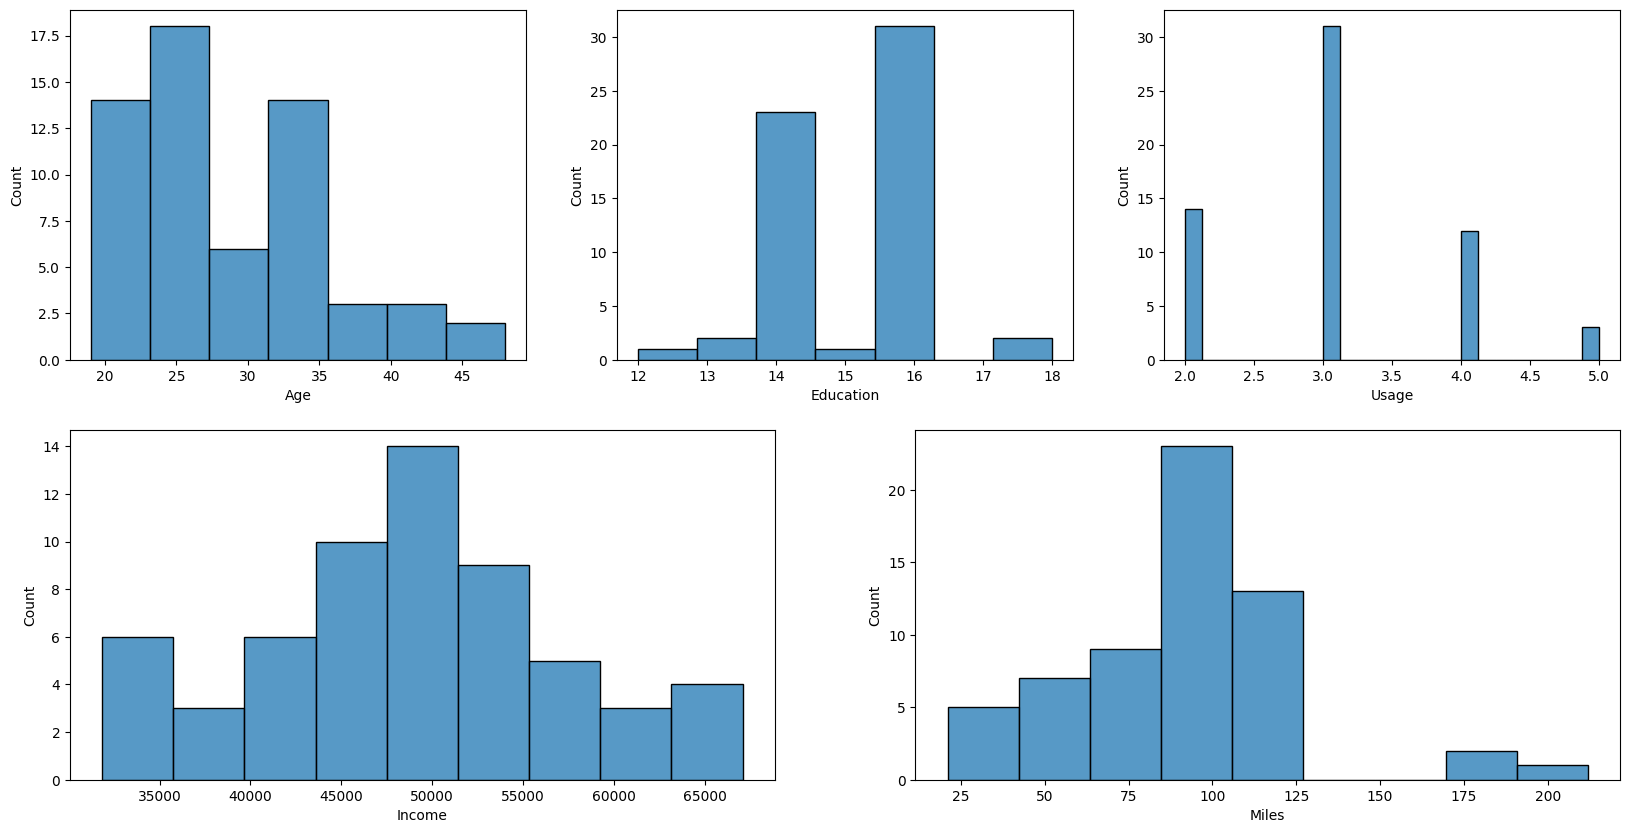

In [ ]:
customer_kp481 = df.loc[df['Product'] == 'KP481']
customer_kp481
fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(customer_kp481['Age'])

plt.subplot(2,3,2)
sns.histplot(customer_kp481['Education'])

plt.subplot(2,3,3)
sns.histplot(customer_kp481['Usage'])

plt.subplot(2,2,3)
sns.histplot(customer_kp481['Income'])


plt.subplot(2,2,4)
sns.histplot(customer_kp481['Miles'])

plt.show()

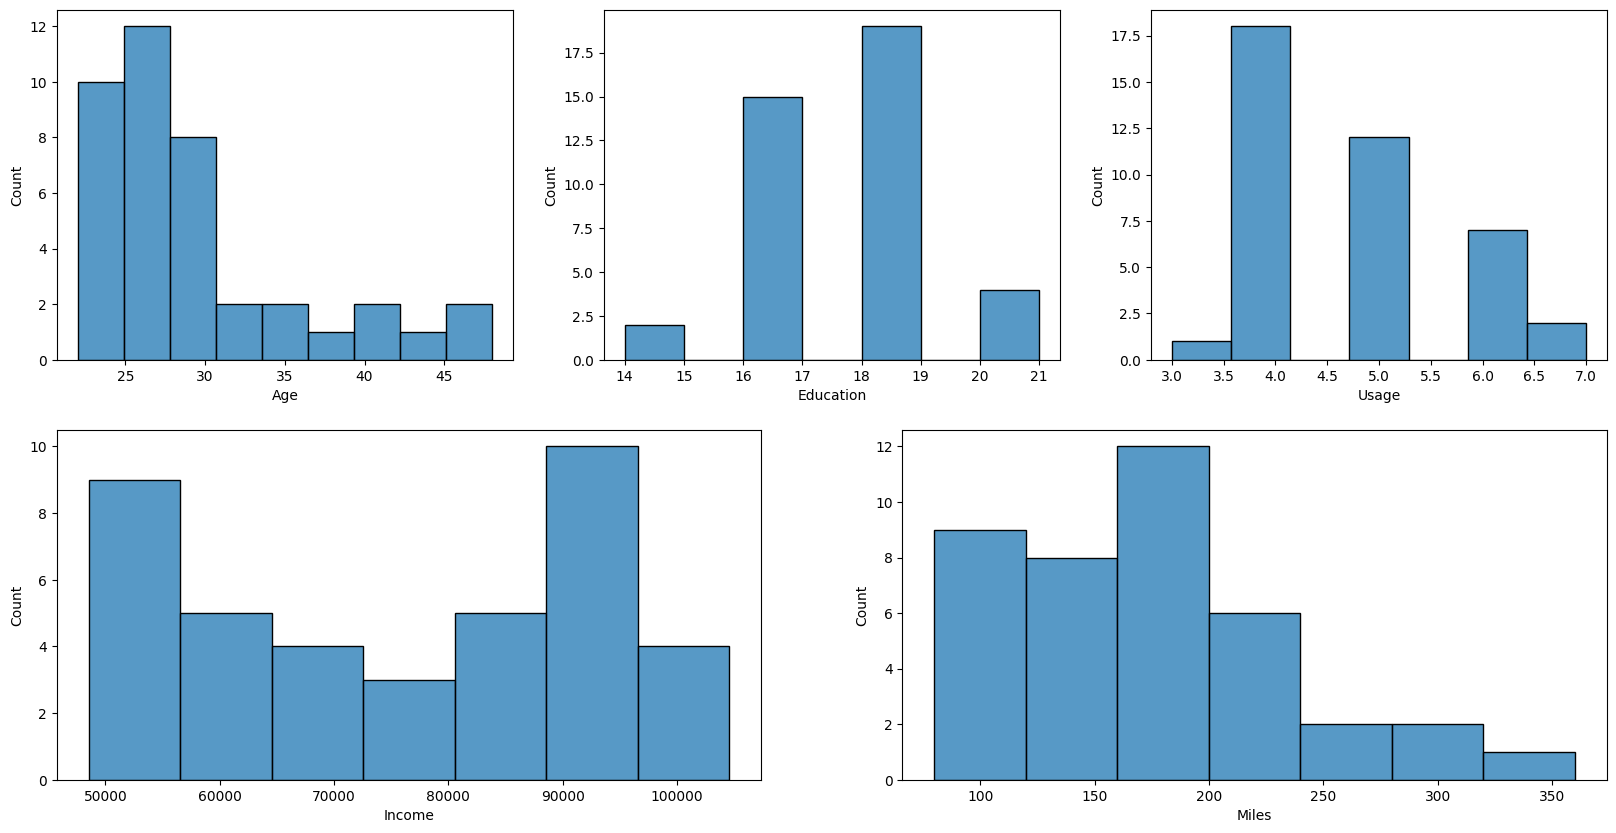

In [ ]:
customer_kp781 = df.loc[df['Product'] == 'KP781']
customer_kp781
fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.histplot(customer_kp781['Age'])

plt.subplot(2,3,2)
sns.histplot(customer_kp781['Education'])

plt.subplot(2,3,3)
sns.histplot(customer_kp781['Usage'])

plt.subplot(2,2,3)
sns.histplot(customer_kp781['Income'])


plt.subplot(2,2,4)
sns.histplot(customer_kp781['Miles'])

plt.show()

**Observations**
1. There is no significant difference between KP281 and KP481 users on factors such as Age, Education, Usage and Income
2. The only exception being KP481 user is more active when compared to KP281 user - More miles on average(70 vs 100)
3. As to KP781 users, they are a class apart with them being more senior in age, education. They tend to be heavy users on account of usage and also Miles run. Also, these users have higher income to be able to affort the advanced product

**Anaysis based on Correlation**
* Let's check if there are any interesting correlation between numerical attributes by creates scatterplots between them

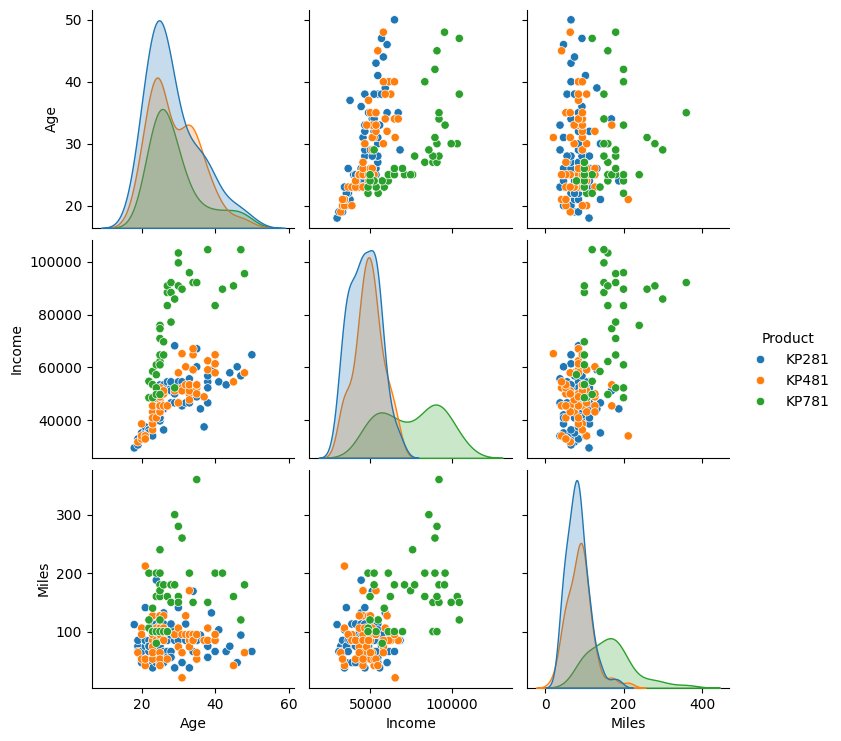

In [ ]:
sns.pairplot(df, vars=['Age', 'Income', 'Miles'], hue='Product')
plt.show()

**Observations**
1. There's no strong correlation between Age and Income of a customer. Users can have higher income regardless of their Age
2. From the Miles vs Income plot, interestingly we can observe that higher income users are more active running more miles on average
3. In general, Age tends to be factor in determining how active a user is. As age increases, we thier their actvity decreases(less Miles per week on average)

Let's continue the correlation analysis but this time using heatmap

In [ ]:
df[['Age','Miles','Income','Usage','Fitness', 'Education']].corr()

,Age,Miles,Income,Usage,Fitness,Education
Age,1.000000,0.036618,0.513414,0.015064,0.061105,0.280496
Miles,0.036618,1.000000,0.543473,0.759130,0.785702,0.307284
Income,0.513414,0.543473,1.000000,0.519537,0.535005,0.625827
Usage,0.015064,0.759130,0.519537,1.000000,0.668606,0.395155
Fitness,0.061105,0.785702,0.535005,0.668606,1.000000,0.410581
Education,0.280496,0.307284,0.625827,0.395155,0.410581,1.000000


Plotting this as heatmap

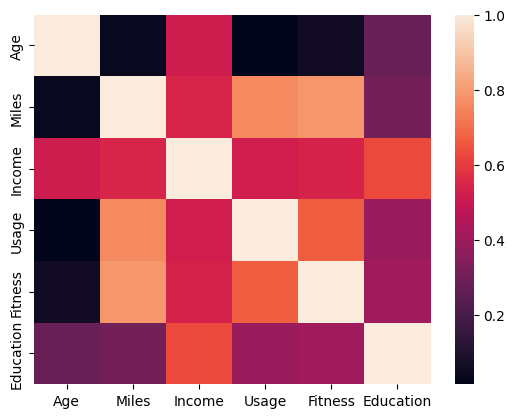

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[['Age','Miles','Income','Usage','Fitness', 'Education']].corr())
plt.show()

**Observations**
1. Among the various factors, Income has the best correlation with other factors. Higher income people are seniors, more active, use treadmill more. Also, relatively more fit and are more educated
2. We also notice that more miles that a user runs per week, the product usage is more and reflects higher on the fitness scale
3. Age doesn't impact the fitness or the usage or the Miles run. Fitness trend is distributed across ages
4. Education vs Income confirms the common intuition that more education brings in more income

**Recommendations**
*   KP781 is targeted towards elite athletes who are more often young. But the outlier analysis indicates there are substantial number of elderly men who purchased the product too. There exists a niche category of customers who desire this product. More research should be done on this group of customers to improve sales from this customer base
*  Currently, Aerofit's product line is skewed towards Male users. Investigate if we are missing any female friendly features.
* Partnered users with more financial stability are likely to buy Aerofit's products. To balance the equation, we should introduct easy finance options for single/student customers.
* Income analysis indicates Aerofit's customers minimum income starts from 30000. Check if there is room for lowering the entry level product to capture the 20000 to 30000 income category. Also, provide easy EMI options
* KP781 has a overwhelmingly male user base of 82.5%. Since this is the advanced product category, why are female athletes not preferring Aerofit? This needs to be investigated
* Most customers of KP781 are highly educated and have higher income. Since these are educated customers, can the UI of the product be simplified? See if we can reduce the number of clicks for setup. Also, we can introduce more advanced features to solidify this customer base which has high tolerance for price increase
* The more active a customer, he prefers a higher product line. Ask the customer on his activity level and recommend the correct product line.

